In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset
[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [117]:
plasma = pd.read_csv('plasma(Specific Metabolics)_final.csv')
serum = pd.read_csv('serum(Specific Metabolics)_final.csv')
plasma.head()
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)

Keep labels as an numpy array.

In [118]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))
targets = plasma.iloc[:, -1].unique()

# PCA, tSNE & Other Functions
## PCA

In [119]:
from sklearn.decomposition import PCA
def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [120]:
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [121]:
def plotting(pca_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("Principal Component Analysis",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'PC{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'PC{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = pca_df.Class == target
                axes[i, j-1].scatter(pca_df.loc[indicesToKeep, f'pc{i+1}']
                                , pca_df.loc[indicesToKeep, f'pc{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

## t-SNE

In [122]:
from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)

    return tsne_concatenate

In [123]:
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [124]:
def tsne_plotting(tsne_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("t-SNE",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'TSNE{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'TSNE{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = tsne_df.Class == target
                axes[i, j-1].scatter(tsne_df.loc[indicesToKeep, f'tsne{i+1}']
                                , tsne_df.loc[indicesToKeep, f'tsne{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

# EDA
## Plasma

In [125]:
pca2_plasma = pca_analysis(plasma, 2)

pca2_plasma_df = make_dataframe(pca2_plasma, 2)
# print(pca2_plasma_df.head)

<Figure size 432x288 with 0 Axes>

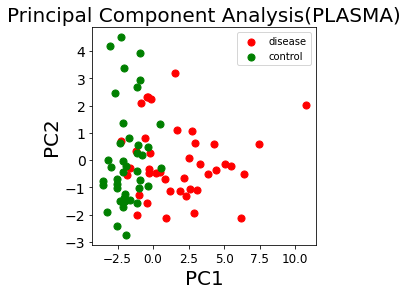

In [126]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis(PLASMA)",fontsize=20)
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_plasma_df.Class == target
    plt.scatter(pca2_plasma_df.loc[indicesToKeep, 'pc1']
               , pca2_plasma_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [127]:
pca3_plasma = pca_analysis(plasma, 3)

pca3_plasma_df = make_dataframe(pca3_plasma, 3)
# print(pca3_df.head)

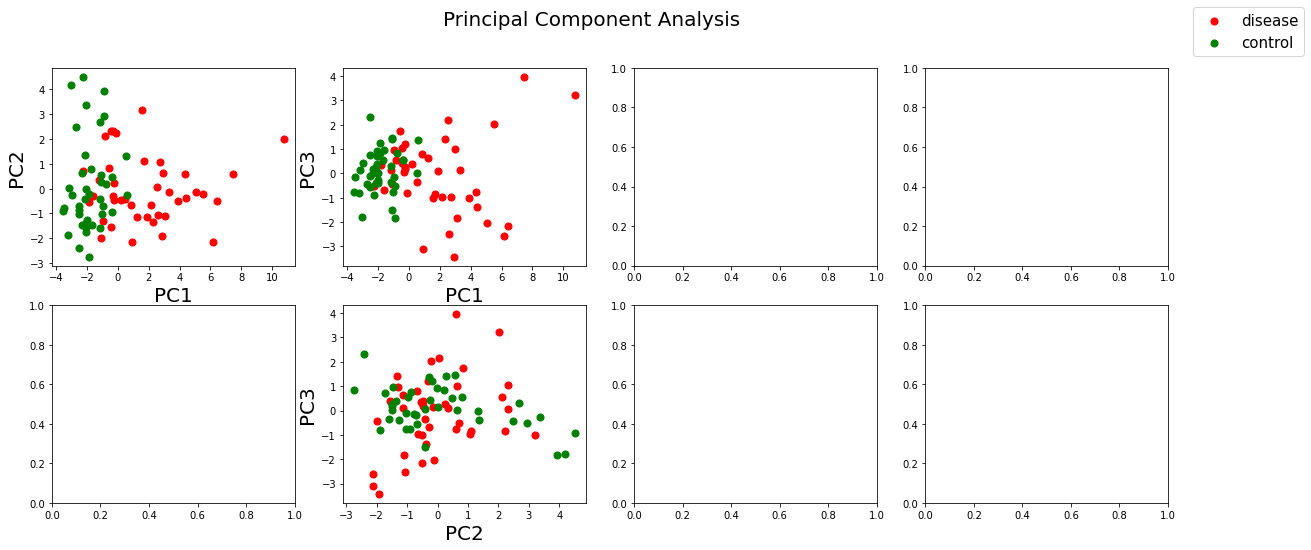

In [128]:
plotting(pca3_plasma_df, 3)

In [129]:
pca4_plasma = pca_analysis(plasma, 4)

pca4_plasma_df = make_dataframe(pca4_plasma, 4)
# print(pca4_plasma_df.head)

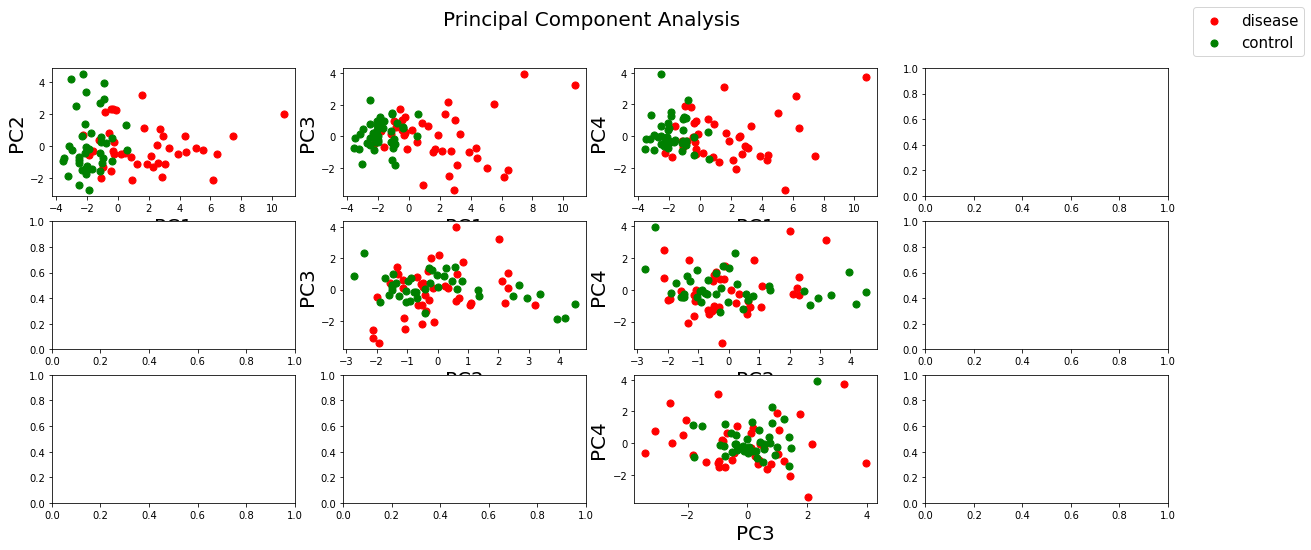

In [130]:
plotting(pca4_plasma_df, 4)

In [131]:
pca5_plasma = pca_analysis(plasma, 5)

pca5_plasma_df = make_dataframe(pca5_plasma, 5)
# print(pca5_df.head)

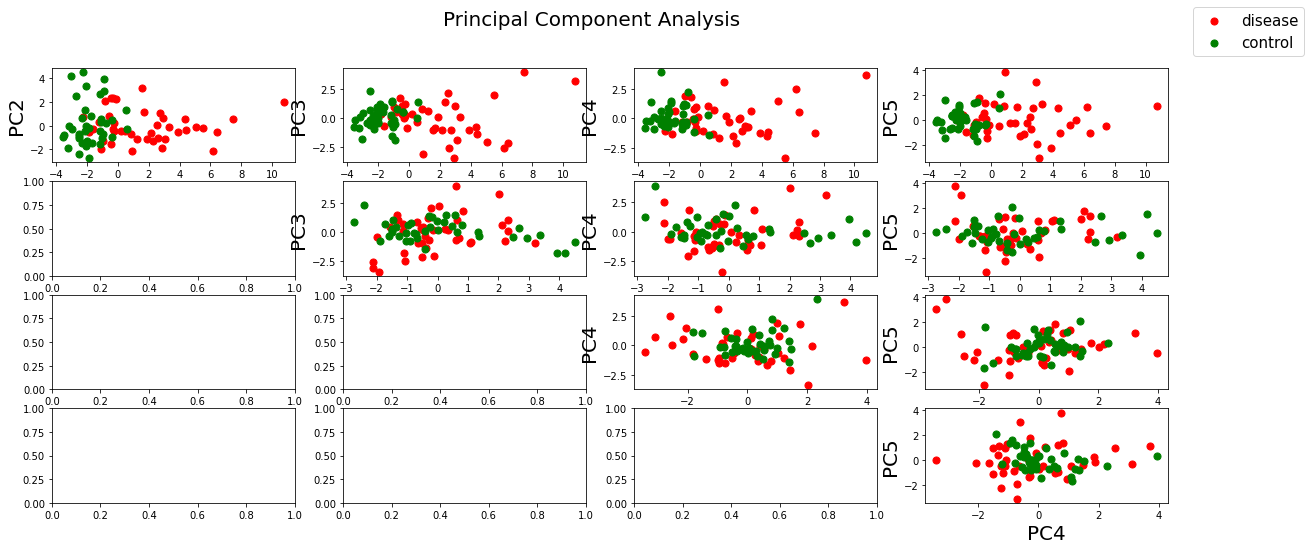

In [132]:
plotting(pca5_plasma_df, 5)

In [133]:
# now do PCA for 10, 15, 20
pca10_plasma = pca_analysis(plasma, 10)
pca10_plasma_df = make_dataframe(pca10_plasma, 10)

pca15_plasma = pca_analysis(plasma, 15)
pca15_plasma_df = make_dataframe(pca15_plasma, 15)

pca20_plasma = pca_analysis(plasma, 20)
pca20_plasma_df = make_dataframe(pca20_plasma, 20)
# print(pca20_plasma.head)

In [134]:
# pca15_plasma_df.to_csv("plasma/pca15_plasma_metabolics.csv")

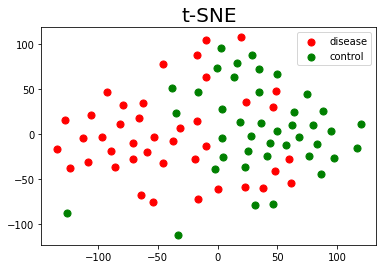

In [135]:
tsne2_plasma = tsne_analysis(plasma, 2)

tsne2_plasma_df = tsne_dataframe(tsne2_plasma, 2)
# print(tsne2_plasma_df.head)
# plotting(tsne2_plasma_df, 1, 1)
plt.title("t-SNE",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_plasma_df.Class == target
    plt.scatter(tsne2_plasma_df.loc[indicesToKeep, 'tsne1']
               , tsne2_plasma_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)
plt.legend(targets,prop={'size': 10})

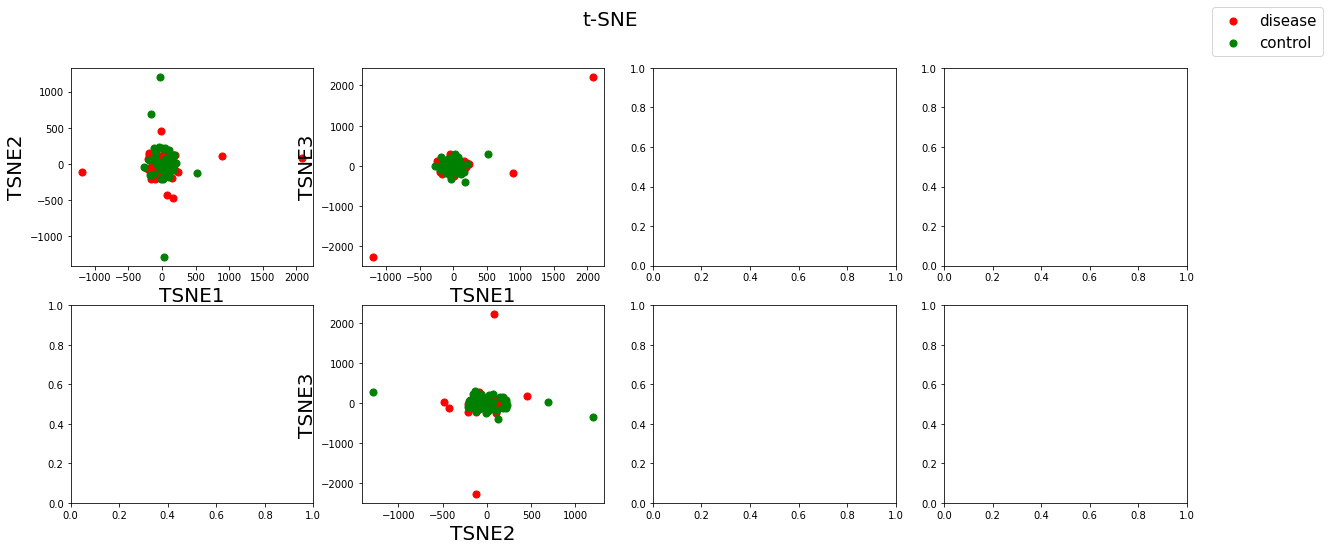

In [136]:
tsne3_plasma = tsne_analysis(plasma, 3)

tsne3_plasma_df = tsne_dataframe(tsne3_plasma, 3)
# print(tsne2_plasma_df.head)
tsne_plotting(tsne3_plasma_df, 3)


In [137]:
# tsne2_plasma_df.to_csv('plasma/tsne2_plasma_metabolics.csv')

## Serum

In [138]:
pca2_serum = pca_analysis(serum, 2)

pca2_serum_df = make_dataframe(pca2_serum, 2)
pca2_serum_df.head()

,pc1,pc2,Class
0,-0.65,-0.52,disease
1,0.53,-1.63,disease
2,1.07,-2.26,disease
3,-0.03,-0.51,disease
4,-1.71,1.49,disease


<Figure size 432x288 with 0 Axes>

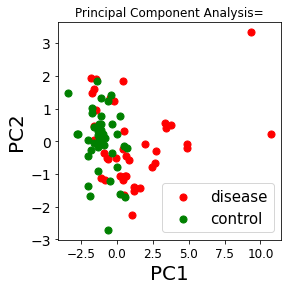

In [139]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_serum_df.Class == target
    plt.scatter(pca2_serum_df.loc[indicesToKeep, 'pc1']
               , pca2_serum_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [140]:
pca3_serum = pca_analysis(serum, 3)

pca3_serum_df = make_dataframe(pca3_serum, 3)
# pca3_df.head()

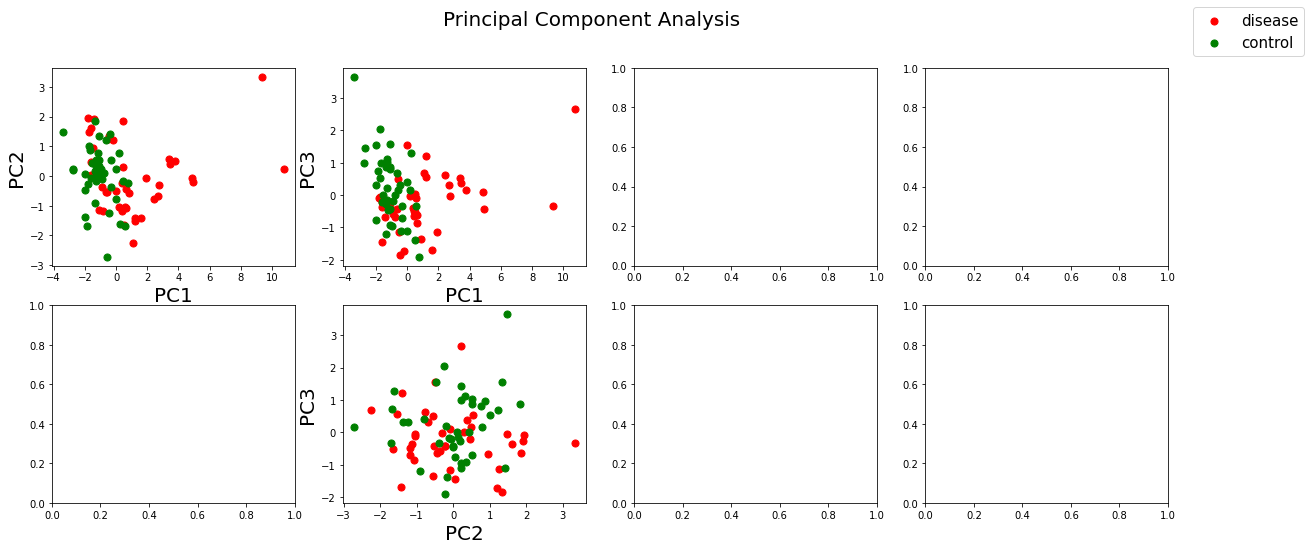

In [141]:
plotting(pca3_serum_df, 3)

In [142]:
pca4_serum = pca_analysis(serum, 4)

pca4_serum_df = make_dataframe(pca4_serum, 4)
# pca4_serum_df.head()

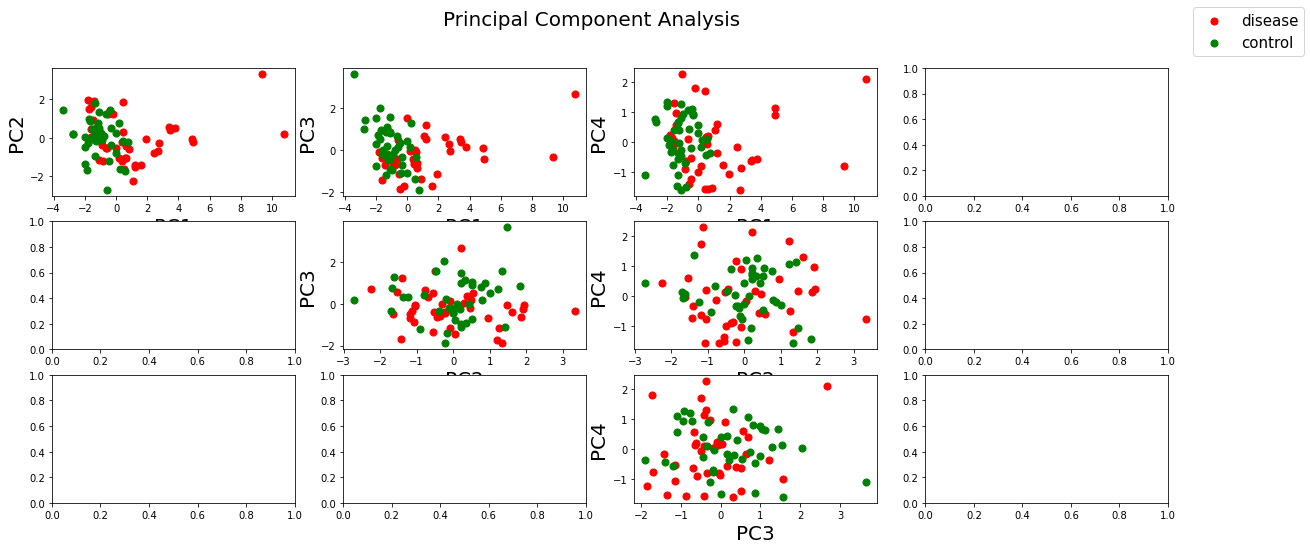

In [143]:
plotting(pca4_serum_df, 4)

In [144]:
pca5_serum = pca_analysis(serum, 5)

pca5_serum_df = make_dataframe(pca5_serum, 5)
# pca5_serum_df.head()

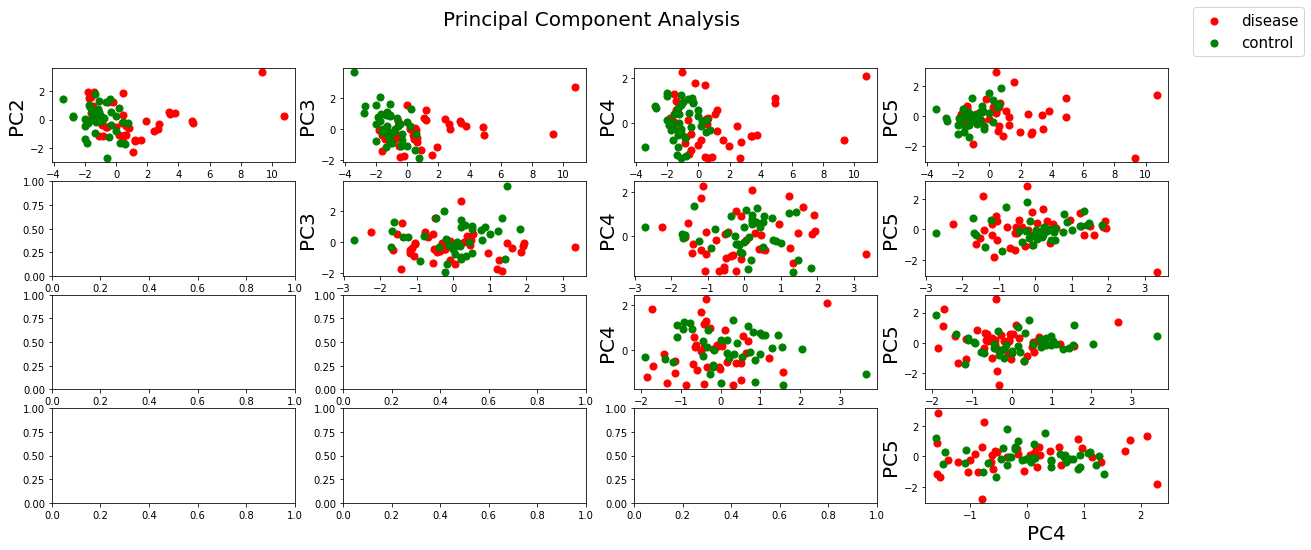

In [145]:
plotting(pca5_serum_df, 5)

In [146]:
# now do PCA for 10, 15, 20
pca10_serum = pca_analysis(serum, 10)
pca10_serum_df = make_dataframe(pca10_serum, 10)

# pca20_serum.head()

In [147]:
# pca15_serum_df.to_csv("serum/pca15_serum_metabolics.csv")

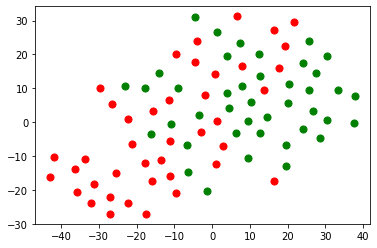

In [148]:
tsne2_serum = tsne_analysis(serum, 2)

tsne2_serum_df = tsne_dataframe(tsne2_serum, 2)
# print(tsne2_serum_df.head)
# plotting(tsne2_serum_df, 1, 1)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_serum_df.Class == target
    plt.scatter(tsne2_serum_df.loc[indicesToKeep, 'tsne1']
               , tsne2_serum_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)

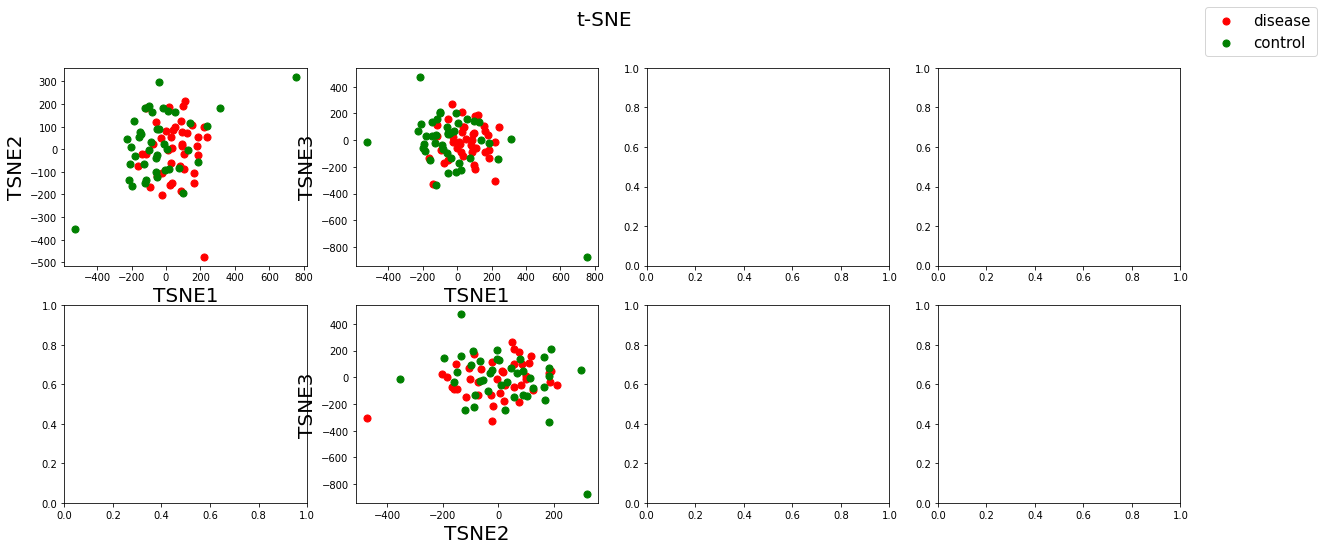

In [149]:
tsne3_serum = tsne_analysis(serum, 3)

tsne3_serum_df = tsne_dataframe(tsne3_serum, 3)
# print(tsne3_serum_df.head)
tsne_plotting(tsne3_serum_df, 3)


In [150]:
# tsne2_serum_df.to_csv('plasma/tsne2_serum_metabolics.csv')

# Models

In [151]:
# !pip install lazypredict

In [152]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

In [153]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [154]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [155]:
# # make the independent variables float type
# pca2_plasma_df['Class'].map({"control": 0, "disease": 1})
# plasma = pca2_plasma_df.apply(pd.to_numeric)
# plasma

In [156]:
# full_result = []
# accuracy = []
# for k in [0, 2, 3, 4, 5, 10, 15, 20, 22, 23]:
#     if k==0:
#         name = ['Plasma(Specific Metabolics)', 'Serum(Specific Metabolics)']
#         dfs = [plasma, serum]
#     elif k==22 or k==23:
#         name = [f'tsne{k-20}_plasma(Specific Metabolics)', f'tsne{k-20}_serum(Specific Metabolics)']
#         dfs = [vars()[f'tsne{k-20}_plasma_df'], vars()[f'tsne{k-20}_serum_df']]
#     else:
#         if k>10:
#             name = [f'pca{k}_plasma(Specific Metabolics)']
#             dfs = [vars()[f'pca{k}_plasma_df']]
#         else:
#             name = [f'pca{k}_plasma(Specific Metabolics)', f'pca{k}_serum(Specific Metabolics)']
#             dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
    
#     random_state = 42

#     for idx, data in enumerate(dfs):
#       result = []
#       X, y = get_xy(data)
#       rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
#       raw_x = X
#       for train_index, test_index in rs.split(X):
#         clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         models, predictions = clf.fit(X_train, X_test, y_train, y_test)
#         result.append(models)

#       acc = []
#       for i in range(10):
#         acc.append(result[i].iloc[0]['Balanced Accuracy'])

#       print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
#       accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
#       full_result.append([name[idx], result])

In [157]:
# accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])
# accuracy_df

In [158]:
# accuracy_df.to_csv('accuracy/accuracy_Specific Metabolics_final.csv')

In [159]:
# full_result

# Debug

In [160]:
full_result = []
accuracy = []
for k in [0]:
    if k==0:
        name = ['Plasma(Specific Metabolics)']
        dfs = [plasma]
    elif k==22 or k==23:
        name = [f'tsne{k-20}_plasma(Specific Metabolics)', f'tsne{k-20}_serum(Specific Metabolics)']
        dfs = [vars()[f'tsne{k-20}_plasma_df'], vars()[f'tsne{k-20}_serum_df']]
    else:
        if k>10:
            name = [f'pca{k}_plasma(Specific Metabolics)']
            dfs = [vars()[f'pca{k}_plasma_df']]
        else:
            name = [f'pca{k}_plasma(Specific Metabolics)', f'pca{k}_serum(Specific Metabolics)']
            dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=random_state)
      raw_x = X
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)

      acc = []
      for i in range(1):
        acc.append(result[i].iloc[0]['Balanced Accuracy'])

#       print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
#       accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
      full_result.append(result)

100%|██████████| 29/29 [00:00<00:00, 51.88it/s]


In [161]:
# full_result

In [162]:
# full_result[0][0]

In [164]:
# model_names = full_result[0][9].index
model_names

Index(['ExtraTreeClassifier', 'DecisionTreeClassifier', 'XGBClassifier',
       'RandomForestClassifier', 'NearestCentroid', 'KNeighborsClassifier',
       'QuadraticDiscriminantAnalysis', 'LinearSVC', 'BaggingClassifier',
       'SGDClassifier', 'LogisticRegression', 'LGBMClassifier',
       'CalibratedClassifierCV', 'GaussianNB', 'BernoulliNB',
       'PassiveAggressiveClassifier', 'LabelSpreading', 'LabelPropagation',
       'ExtraTreesClassifier', 'Perceptron', 'LinearDiscriminantAnalysis',
       'RidgeClassifier', 'AdaBoostClassifier', 'NuSVC', 'SVC',
       'RidgeClassifierCV', 'DummyClassifier'],
      dtype='object', name='Model')

In [ ]:
full_result[0][10].iloc[0]['Balanced Accuracy']

In [165]:
model_topper = {}
for i in model_names:
    vars()[i] = [0, 0.0]
    model_topper[i] = vars()[i]
for i in range(1):
    for j in range(len(model_names)):
        if full_result[0][i].index[0] == model_names[j]:
            vars()[model_names[j]][0] += 1
        vars()[model_names[j]][1] += full_result[0][i].loc[model_names[j]]['Balanced Accuracy']
        model_topper[model_names[j]] = vars()[model_names[j]]

model_topper
# r = pd.DataFrame(model_topper, columns=['Calssifiers', 'Topper Occurance & Avg. Acc'])
# r

{'AdaBoostClassifier': [0, 0.7045454545454546],
 'BaggingClassifier': [0, 0.7878787878787878],
 'BernoulliNB': [0, 0.7424242424242424],
 'CalibratedClassifierCV': [0, 0.8257575757575758],
 'DecisionTreeClassifier': [0, 0.6590909090909092],
 'DummyClassifier': [0, 0.606060606060606],
 'ExtraTreeClassifier': [0, 0.696969696969697],
 'ExtraTreesClassifier': [0, 0.8257575757575758],
 'GaussianNB': [0, 0.7348484848484849],
 'KNeighborsClassifier': [0, 0.7727272727272727],
 'LGBMClassifier': [0, 0.7878787878787878],
 'LabelPropagation': [0, 0.7348484848484849],
 'LabelSpreading': [0, 0.7348484848484849],
 'LinearDiscriminantAnalysis': [0, 0.8636363636363636],
 'LinearSVC': [0, 0.7424242424242424],
 'LogisticRegression': [0, 0.8712121212121212],
 'NearestCentroid': [0, 0.8181818181818181],
 'NuSVC': [0, 0.8636363636363636],
 'PassiveAggressiveClassifier': [0, 0.7878787878787878],
 'Perceptron': [0, 0.7878787878787878],
 'QuadraticDiscriminantAnalysis': [0, 0.6590909090909092],
 'RandomForestC

In [168]:
# full_result = []
accuracy = []
for k in [0, 2, 3, 4, 5, 10, 15, 20, 22, 23]:
    if k==0:
        name = ['Plasma(Specific Metabolics)', 'Serum(Specific Metabolics)']
        dfs = [plasma, serum]
    elif k==22 or k==23:
        name = [f'tsne{k-20}_plasma(Specific Metabolics)', f'tsne{k-20}_serum(Specific Metabolics)']
        dfs = [vars()[f'tsne{k-20}_plasma_df'], vars()[f'tsne{k-20}_serum_df']]
    else:
        if k>10:
            name = [f'pca{k}_plasma(Specific Metabolics)']
            dfs = [vars()[f'pca{k}_plasma_df']]
        else:
            name = [f'pca{k}_plasma(Specific Metabolics)', f'pca{k}_serum(Specific Metabolics)']
            dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=random_state)
      raw_x = X
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)

      acc = []
      for i in range(1):
            for j in range(len(model_names)):
                if result[i].index[j] == 'RidgeClassifier':
                    acc.append(result[i].loc['RidgeClassifier']['Balanced Accuracy'])
#                     print(result[i].index[j], result[i].iloc[j]['Balanced Accuracy'])

      print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
      accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])
        
#       full_result.append([name[idx], result])

  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


Plasma(Specific Metabolics): 0.9090909090909092


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


Serum(Specific Metabolics): 0.7348484848484849


  7%|▋         | 2/29 [00:00<00:01, 19.04it/s]


pca2_plasma(Specific Metabolics): 0.8181818181818181


  7%|▋         | 2/29 [00:00<00:01, 19.23it/s]


pca2_serum(Specific Metabolics): 0.6515151515151515


  7%|▋         | 2/29 [00:00<00:01, 18.86it/s]


pca3_plasma(Specific Metabolics): 0.8181818181818181


  7%|▋         | 2/29 [00:00<00:01, 16.95it/s]


pca3_serum(Specific Metabolics): 0.6515151515151515


  7%|▋         | 2/29 [00:00<00:01, 19.23it/s]


pca4_plasma(Specific Metabolics): 0.8181818181818181


  7%|▋         | 2/29 [00:00<00:01, 18.01it/s]


pca4_serum(Specific Metabolics): 0.6515151515151515


  7%|▋         | 2/29 [00:00<00:01, 18.35it/s]


pca5_plasma(Specific Metabolics): 0.8181818181818181


  7%|▋         | 2/29 [00:00<00:01, 18.69it/s]


pca5_serum(Specific Metabolics): 0.6515151515151515


  7%|▋         | 2/29 [00:00<00:01, 18.35it/s]


pca10_plasma(Specific Metabolics): 0.8181818181818181


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


pca10_serum(Specific Metabolics): 0.7348484848484849


  7%|▋         | 2/29 [00:00<00:01, 18.01it/s]


pca15_plasma(Specific Metabolics): 0.9090909090909092


  7%|▋         | 2/29 [00:00<00:01, 18.69it/s]


pca20_plasma(Specific Metabolics): 0.9090909090909092


  7%|▋         | 2/29 [00:00<00:01, 17.09it/s]


tsne2_plasma(Specific Metabolics): 0.8181818181818181


  7%|▋         | 2/29 [00:00<00:01, 18.86it/s]


tsne2_serum(Specific Metabolics): 0.6136363636363636


  7%|▋         | 2/29 [00:00<00:01, 19.04it/s]


tsne3_plasma(Specific Metabolics): 0.5


100%|██████████| 29/29 [00:00<00:00, 51.69it/s]


tsne3_serum(Specific Metabolics): 0.6893939393939394


In [67]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])
accuracy_df

,Processed Dataset,Accuracy
0,Plasma(Specific Metabolics),0.7677690365190366
1,Serum(Specific Metabolics),0.8024815462315462
